In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import register_matplotlib_converters
from pandas.tseries.offsets import MonthEnd
# from pytrends.request import TrendReq
from pytrends import dailydata
from scipy.stats import iqr
import seaborn as sns

plt.style.use('fivethirtyeight')
register_matplotlib_converters()

In [17]:
# http://forbrains.co.uk/international_tools/earth_timezones

keywords = ["ache+pain", "dengue", "fever", "headache", "vomiting", "nausea", "rashes", "eye pain"]
df_dict = {}

for k in keywords:
    df_dict[k] = dailydata.get_daily_data(k, 2004, 1, 2019, 12, geo="SG", tz=480)

# fever_df = pytrends.dailydata.get_daily_data("fever", 2004, 1, 2019, 12, "SG")
# fever_df = dailydata.get_daily_data("fever", 2004, 1, 2004, 2, "SG")
# fever_df = dailydata.get_daily_data("ache+pain", 2004, 1, 2004, 2, geo="SG", tz=480)

480
ache+pain:2004-01-01 2004-01-31
ache+pain:2004-02-01 2004-02-29
ache+pain:2004-03-01 2004-03-31
ache+pain:2004-04-01 2004-04-30
ache+pain:2004-05-01 2004-05-31
ache+pain:2004-06-01 2004-06-30
ache+pain:2004-07-01 2004-07-31
ache+pain:2004-08-01 2004-08-31
ache+pain:2004-09-01 2004-09-30
ache+pain:2004-10-01 2004-10-31
ache+pain:2004-11-01 2004-11-30
ache+pain:2004-12-01 2004-12-31
ache+pain:2005-01-01 2005-01-31
ache+pain:2005-02-01 2005-02-28
ache+pain:2005-03-01 2005-03-31
ache+pain:2005-04-01 2005-04-30
ache+pain:2005-05-01 2005-05-31
ache+pain:2005-06-01 2005-06-30
ache+pain:2005-07-01 2005-07-31
ache+pain:2005-08-01 2005-08-31
ache+pain:2005-09-01 2005-09-30
ache+pain:2005-10-01 2005-10-31
ache+pain:2005-11-01 2005-11-30
ache+pain:2005-12-01 2005-12-31
ache+pain:2006-01-01 2006-01-31
ache+pain:2006-02-01 2006-02-28
ache+pain:2006-03-01 2006-03-31
ache+pain:2006-04-01 2006-04-30
ache+pain:2006-05-01 2006-05-31
ache+pain:2006-06-01 2006-06-30
ache+pain:2006-07-01 2006-07-31
ache

dengue:2009-12-01 2009-12-31
dengue:2010-01-01 2010-01-31
dengue:2010-02-01 2010-02-28
dengue:2010-03-01 2010-03-31
dengue:2010-04-01 2010-04-30
dengue:2010-05-01 2010-05-31
dengue:2010-06-01 2010-06-30
dengue:2010-07-01 2010-07-31
dengue:2010-08-01 2010-08-31
dengue:2010-09-01 2010-09-30
dengue:2010-10-01 2010-10-31
dengue:2010-11-01 2010-11-30
dengue:2010-12-01 2010-12-31
dengue:2011-01-01 2011-01-31
dengue:2011-02-01 2011-02-28
dengue:2011-03-01 2011-03-31
dengue:2011-04-01 2011-04-30
dengue:2011-05-01 2011-05-31
dengue:2011-06-01 2011-06-30
dengue:2011-07-01 2011-07-31
dengue:2011-08-01 2011-08-31
dengue:2011-09-01 2011-09-30
dengue:2011-10-01 2011-10-31
dengue:2011-11-01 2011-11-30
dengue:2011-12-01 2011-12-31
dengue:2012-01-01 2012-01-31
dengue:2012-02-01 2012-02-29
dengue:2012-03-01 2012-03-31
dengue:2012-04-01 2012-04-30
dengue:2012-05-01 2012-05-31
dengue:2012-06-01 2012-06-30
dengue:2012-07-01 2012-07-31
dengue:2012-08-01 2012-08-31
dengue:2012-09-01 2012-09-30
dengue:2012-10

fever:2018-01-01 2018-01-31
fever:2018-02-01 2018-02-28
fever:2018-03-01 2018-03-31
fever:2018-04-01 2018-04-30
fever:2018-05-01 2018-05-31
fever:2018-06-01 2018-06-30
fever:2018-07-01 2018-07-31
fever:2018-08-01 2018-08-31
fever:2018-09-01 2018-09-30
fever:2018-10-01 2018-10-31
fever:2018-11-01 2018-11-30
fever:2018-12-01 2018-12-31
fever:2019-01-01 2019-01-31
fever:2019-02-01 2019-02-28
fever:2019-03-01 2019-03-31
fever:2019-04-01 2019-04-30
fever:2019-05-01 2019-05-31
fever:2019-06-01 2019-06-30
fever:2019-07-01 2019-07-31
fever:2019-08-01 2019-08-31
fever:2019-09-01 2019-09-30
fever:2019-10-01 2019-10-31
fever:2019-11-01 2019-11-30
fever:2019-12-01 2019-12-31
480
headache:2004-01-01 2004-01-31
headache:2004-02-01 2004-02-29
headache:2004-03-01 2004-03-31
headache:2004-04-01 2004-04-30
headache:2004-05-01 2004-05-31
headache:2004-06-01 2004-06-30
headache:2004-07-01 2004-07-31
headache:2004-08-01 2004-08-31
headache:2004-09-01 2004-09-30
headache:2004-10-01 2004-10-31
headache:2004-

vomiting:2008-04-01 2008-04-30
vomiting:2008-05-01 2008-05-31
vomiting:2008-06-01 2008-06-30
vomiting:2008-07-01 2008-07-31
vomiting:2008-08-01 2008-08-31
vomiting:2008-09-01 2008-09-30
vomiting:2008-10-01 2008-10-31
vomiting:2008-11-01 2008-11-30
vomiting:2008-12-01 2008-12-31
vomiting:2009-01-01 2009-01-31
vomiting:2009-02-01 2009-02-28
vomiting:2009-03-01 2009-03-31
vomiting:2009-04-01 2009-04-30
vomiting:2009-05-01 2009-05-31
vomiting:2009-06-01 2009-06-30
vomiting:2009-07-01 2009-07-31
vomiting:2009-08-01 2009-08-31
vomiting:2009-09-01 2009-09-30
vomiting:2009-10-01 2009-10-31
vomiting:2009-11-01 2009-11-30
vomiting:2009-12-01 2009-12-31
vomiting:2010-01-01 2010-01-31
vomiting:2010-02-01 2010-02-28
vomiting:2010-03-01 2010-03-31
vomiting:2010-04-01 2010-04-30
vomiting:2010-05-01 2010-05-31
vomiting:2010-06-01 2010-06-30
vomiting:2010-07-01 2010-07-31
vomiting:2010-08-01 2010-08-31
vomiting:2010-09-01 2010-09-30
vomiting:2010-10-01 2010-10-31
vomiting:2010-11-01 2010-11-30
vomiting

nausea:2015-01-01 2015-01-31
nausea:2015-02-01 2015-02-28
nausea:2015-03-01 2015-03-31
nausea:2015-04-01 2015-04-30
nausea:2015-05-01 2015-05-31
nausea:2015-06-01 2015-06-30
nausea:2015-07-01 2015-07-31
nausea:2015-08-01 2015-08-31
nausea:2015-09-01 2015-09-30
nausea:2015-10-01 2015-10-31
nausea:2015-11-01 2015-11-30
nausea:2015-12-01 2015-12-31
nausea:2016-01-01 2016-01-31
nausea:2016-02-01 2016-02-29
nausea:2016-03-01 2016-03-31
nausea:2016-04-01 2016-04-30
nausea:2016-05-01 2016-05-31
nausea:2016-06-01 2016-06-30
nausea:2016-07-01 2016-07-31
nausea:2016-08-01 2016-08-31
nausea:2016-09-01 2016-09-30
nausea:2016-10-01 2016-10-31
nausea:2016-11-01 2016-11-30
nausea:2016-12-01 2016-12-31
nausea:2017-01-01 2017-01-31
nausea:2017-02-01 2017-02-28
nausea:2017-03-01 2017-03-31
nausea:2017-04-01 2017-04-30
nausea:2017-05-01 2017-05-31
nausea:2017-06-01 2017-06-30
nausea:2017-07-01 2017-07-31
nausea:2017-08-01 2017-08-31
nausea:2017-09-01 2017-09-30
nausea:2017-10-01 2017-10-31
nausea:2017-11

eye pain:2006-06-01 2006-06-30
eye pain:2006-07-01 2006-07-31
eye pain:2006-08-01 2006-08-31
eye pain:2006-09-01 2006-09-30
eye pain:2006-10-01 2006-10-31
eye pain:2006-11-01 2006-11-30
eye pain:2006-12-01 2006-12-31
eye pain:2007-01-01 2007-01-31
eye pain:2007-02-01 2007-02-28
eye pain:2007-03-01 2007-03-31
eye pain:2007-04-01 2007-04-30
eye pain:2007-05-01 2007-05-31
eye pain:2007-06-01 2007-06-30
eye pain:2007-07-01 2007-07-31
eye pain:2007-08-01 2007-08-31
eye pain:2007-09-01 2007-09-30
eye pain:2007-10-01 2007-10-31
eye pain:2007-11-01 2007-11-30
eye pain:2007-12-01 2007-12-31
eye pain:2008-01-01 2008-01-31
eye pain:2008-02-01 2008-02-29
eye pain:2008-03-01 2008-03-31
eye pain:2008-04-01 2008-04-30
eye pain:2008-05-01 2008-05-31
eye pain:2008-06-01 2008-06-30
eye pain:2008-07-01 2008-07-31
eye pain:2008-08-01 2008-08-31
eye pain:2008-09-01 2008-09-30
eye pain:2008-10-01 2008-10-31
eye pain:2008-11-01 2008-11-30
eye pain:2008-12-01 2008-12-31
eye pain:2009-01-01 2009-01-31
eye pain

In [58]:
df = pd.DataFrame()
for k in keywords:
    df[k] = df_dict[k][k].copy()
df.fillna(0, inplace=True)
df.iloc[2 : -28].tail(10)

,ache+pain,dengue,fever,headache,vomiting,nausea,rashes,eye pain
date,,,,,,,,
2019-11-20,65.96,8.36,50.63,73.15,44.55,30.10,28.62,33.12
2019-11-21,88.27,15.39,53.68,56.05,19.44,34.40,42.12,24.48
2019-11-22,70.81,19.00,45.75,50.35,53.46,42.14,16.74,43.20
2019-11-23,89.24,13.11,55.51,89.30,51.03,26.66,20.52,18.72
2019-11-24,75.66,9.50,46.97,59.85,50.22,39.56,11.88,18.72
2019-11-25,93.12,12.54,43.92,64.60,34.02,39.56,24.84,32.16
2019-11-26,69.84,12.35,61.00,65.55,34.83,38.70,28.62,16.80
2019-11-27,77.60,12.54,50.02,72.20,21.87,55.04,21.06,16.80
2019-11-28,69.84,8.17,37.21,60.80,38.88,19.78,35.10,24.48


In [59]:
df["date"] = df.index
weekly_df = df.iloc[2 : -28].groupby([pd.Grouper(key="date", freq="7D")])[keywords].sum().reset_index()
for k in keywords:
    weekly_df[f"{k}-norm"] = weekly_df[k] / weekly_df[k].max()
weekly_df.set_index("date", inplace=True)
weekly_df.to_csv("./output/weekly_gtrend_data.csv")

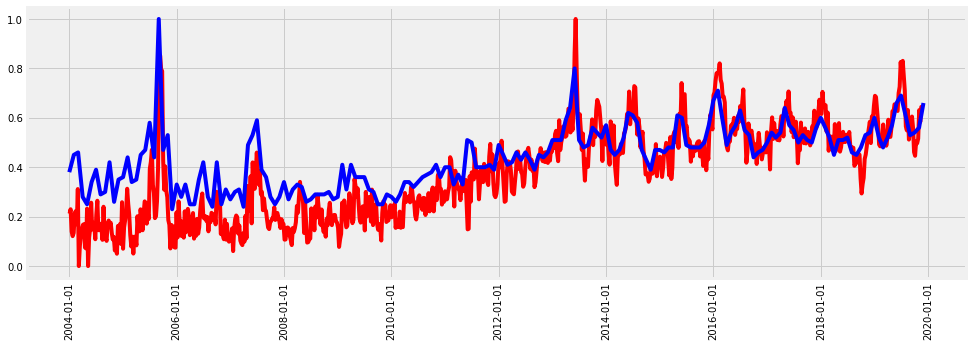

In [60]:
monthly_df = pd.read_csv("./input/gtrend_monthly.csv", index_col=[0],
                         parse_dates=[0]).replace("-", np.nan).astype(float)
for k in keywords:
    monthly_df[f"{k}-norm"] = monthly_df[k] / monthly_df[k].max()

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis_date()
ax.plot(weekly_df.index, weekly_df["fever-norm"], c="r")
ax.plot(monthly_df.index, monthly_df["fever-norm"], c="b")

plt.xticks(rotation=90)
plt.show()

In [62]:
input_df = pd.read_csv("./output/input_data.csv", index_col=[0], parse_dates=[0]).astype(float)
gtrend_df = pd.read_csv("./output/weekly_gtrend_data.csv", index_col=[0], parse_dates=[0]).astype(float)
big_df = pd.concat([input_df.reindex(gtrend_df.index), gtrend_df], axis=1)
big_df.to_csv("./output/input_gtrend_data.csv")